In [33]:
#Importing libraries and API's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Data Acquisition
data=pd.read_csv("bankloans.csv")
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [35]:
#data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [36]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [37]:
#data cleaning

data.dropna(subset=["default"],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


<Axes: xlabel='age', ylabel='income'>

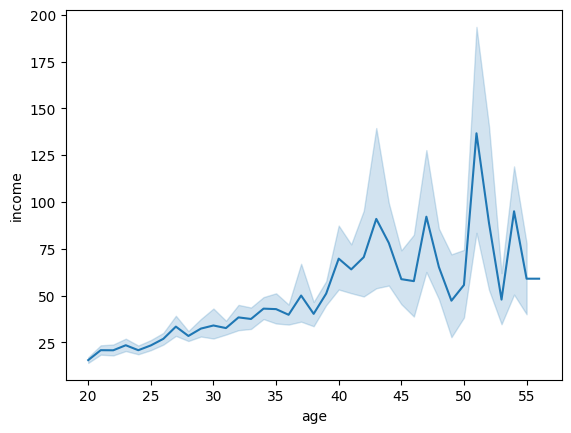

In [39]:
#data visulaization
sns.lineplot(x='age',y='income',data=data)

<Axes: xlabel='age', ylabel='debtinc'>

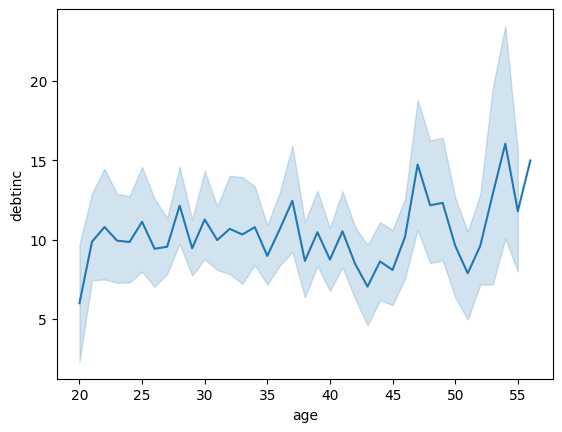

In [40]:
sns.lineplot(x='age',y='debtinc',data=data)

In [41]:
#Train test split
x=data.drop(['default'],axis=1)
y=data['default']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
model=LogisticRegression()
lr=model.fit(x_train,y_train)
lr

LogisticRegression()

In [43]:
y_pred_lr=lr.predict(x_test)
cm=confusion_matrix(y_pred_lr,y_test)
acc=accuracy_score(y_pred_lr,y_test)
prec=precision_score(y_pred_lr,y_test)
rec=recall_score(y_pred_lr,y_test)
f1=f1_score(y_pred_lr,y_test)
print("Confusion Matrix: ",cm)
print("Accuracy: {:0.2f}, Precesion: {:0.2f}, Recall: {:0.2f}, F1 Score: {:0.2f}".format(acc,prec,rec,f1))

Confusion Matrix:  [[151  18]
 [ 10  31]]
Accuracy: 0.87, Precesion: 0.63, Recall: 0.76, F1 Score: 0.69


<Axes: >

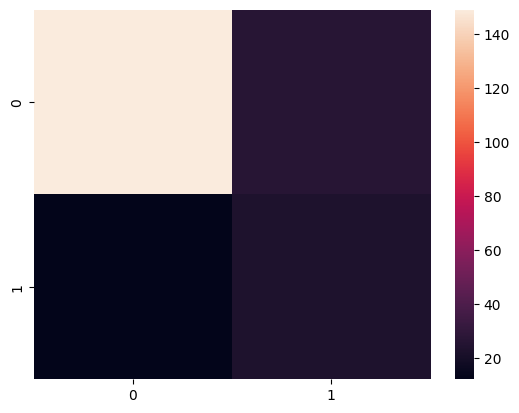

In [50]:
sns.heatmap(cm)

In [44]:
support_vector=SVC().fit(x_train,y_train)
support_vector

SVC()

In [45]:
y_pred_sv=support_vector.predict(x_test)
cm=confusion_matrix(y_pred_sv,y_test)
acc=accuracy_score(y_pred_sv,y_test)
prec=precision_score(y_pred_sv,y_test)
rec=recall_score(y_pred_sv,y_test)
f1=f1_score(y_pred_sv,y_test)
print("Confusion Matrix: ",cm)
print("Accuracy: {:0.2f}, Precesion: {:0.2f}, Recall: {:0.2f}, F1 Score: {:0.2f}".format(acc,prec,rec,f1))

Confusion Matrix:  [[161  47]
 [  0   2]]
Accuracy: 0.78, Precesion: 0.04, Recall: 1.00, F1 Score: 0.08


<Axes: >

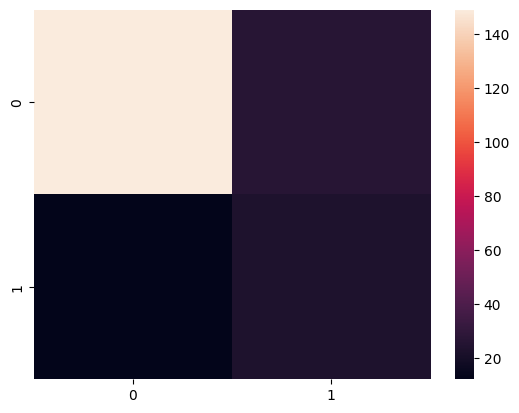

In [49]:
sns.heatmap(cm)

In [46]:
rfc=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
rfc

RandomForestClassifier()

In [47]:
y_pred_rfc=rfc.predict(x_test)
cm=confusion_matrix(y_pred_rfc,y_test)
acc=accuracy_score(y_pred_rfc,y_test)
prec=precision_score(y_pred_rfc,y_test)
rec=recall_score(y_pred_rfc,y_test)
f1=f1_score(y_pred_rfc,y_test)
print("Confusion Matrix: ",cm)
print("Accuracy: {:0.2f}, Precesion: {:0.2f}, Recall: {:0.2f}, F1 Score: {:0.2f}".format(acc,prec,rec,f1))

Confusion Matrix:  [[149  26]
 [ 12  23]]
Accuracy: 0.82, Precesion: 0.47, Recall: 0.66, F1 Score: 0.55


<Axes: >

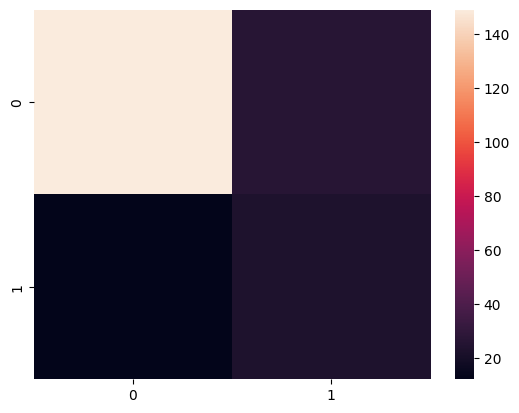

In [48]:
sns.heatmap(cm)